# 연구노트

| | experiment 1 | experiment 2 | experiment 3|
|--: | :--: | :--: | :--: |
model_name    | 'gat' |||
dataset_name  | 'citeseer' |||
model_params  | - | - | -|
num_layers    | 2 | 8 | 8 |
hidden_dim    | 512 | 256 | 512 |
num_heads     | 8 | 8 | 8 |
drop_out      | 0.4 | 0.4 | 0.4|
optim_name    | 'adam' 
optim_params  |
num_layers    | 0.0006998


In [5]:
import sys
sys.path.append('../../')
import yaml
from os import listdir
import torch

from src.dataset    import DATASET_LIST
from src.model      import GAT

In [6]:
cite = list(DATASET_LIST.values())[0](data_path='../../data').dataset
cite[0]

print(sum(cite[0].val_mask))
print(sum(cite[0].train_mask))
print(sum(cite[0].test_mask))

tensor(500)
tensor(120)
tensor(1000)


## Experiment 2

In [2]:
with open('gat_citeseer.yaml', 'r') as f:
    configs = yaml.safe_load(f)

configs['model_params']['num_layers']   = 8
configs['model_params']['hidden_dim']   = 256
configs['model_params']['num_heads']    = 8
configs['model_params']['drop_out']     = 0.4
print(configs)

{'model_name': 'gat', 'dataset_name': 'citeseer', 'model_params': {'num_layers': 8, 'hidden_dim': 256, 'num_heads': 8, 'drop_out': 0.4}, 'dataset_params': {'data_path': 'data'}, 'optim_name': 'adam', 'optim_params': {'lr': 0.0006998}}


In [3]:
ckpt_list = [i for i in listdir('log/experiment2') if 'epoch=' in i]
ckpt_list = sorted(ckpt_list, key=lambda x: int(x[6:x.find('-val')]))
print(len(ckpt_list))

30


In [7]:
gat_model = GAT(input_dim=cite[0].num_features,
                output_dim=cite.num_classes,
                **configs['model_params'])
new_state_dict = {}
ckpt_idx = 22

ckpt = torch.load('log/experiment2/'+ckpt_list[ckpt_idx])['state_dict']
for key in ckpt:
    new_state_dict[key[6:]] = ckpt[key]

gat_model.load_state_dict(new_state_dict)
gat_model.eval()

GAT(
  (GAT_module_list): ModuleList(
    (0): GATConv(3703, 256, heads=8)
    (1): GATConv(2048, 256, heads=8)
    (2): GATConv(2048, 256, heads=8)
    (3): GATConv(2048, 256, heads=8)
    (4): GATConv(2048, 256, heads=8)
    (5): GATConv(2048, 256, heads=8)
    (6): GATConv(2048, 256, heads=8)
    (7): GATConv(2048, 6, heads=1)
  )
)

In [8]:
# --- hook function

hiddim_record = []
def my_forward_hook(self, input, output):
    hiddim_record.append(input[0].detach().cpu().numpy())

for layer in gat_model.GAT_module_list:
    layer.register_forward_hook(my_forward_hook)

In [11]:
from sklearn.manifold import TSNE
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

In [10]:
hat_y = gat_model(cite[0].x, cite[0].edge_index)

../../src/model/GAT.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(x)


In [18]:
#
#.     Graph로 표현?
#

import networkx as nx

A = kneighbors_graph(hiddim_record[0], 5)
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

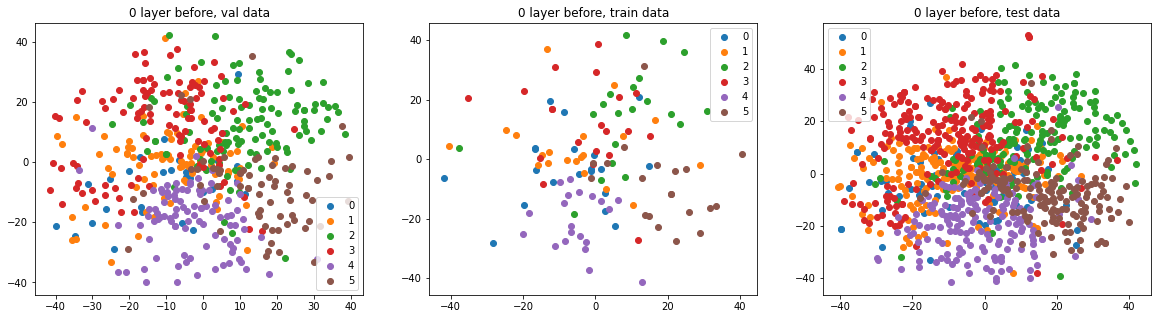

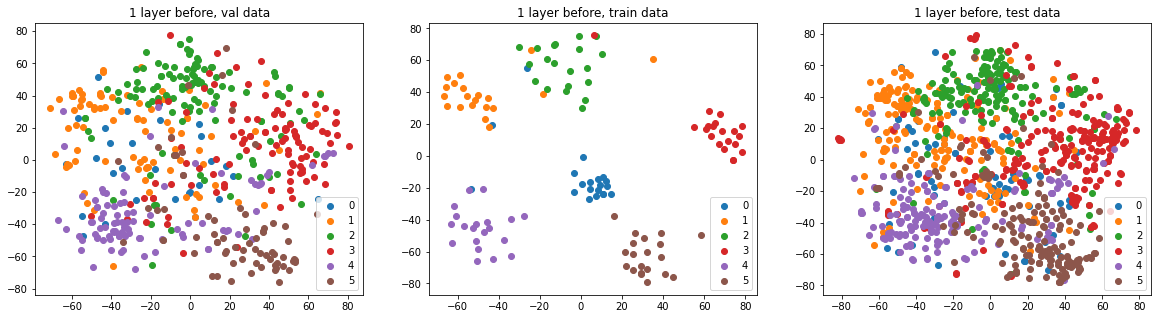

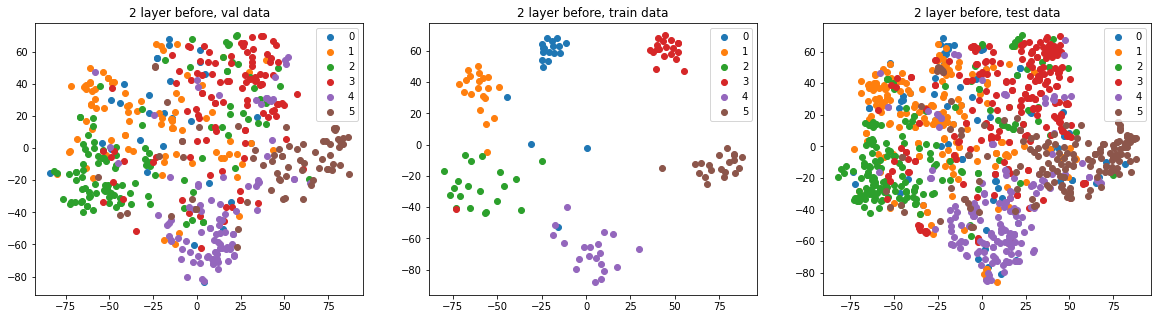

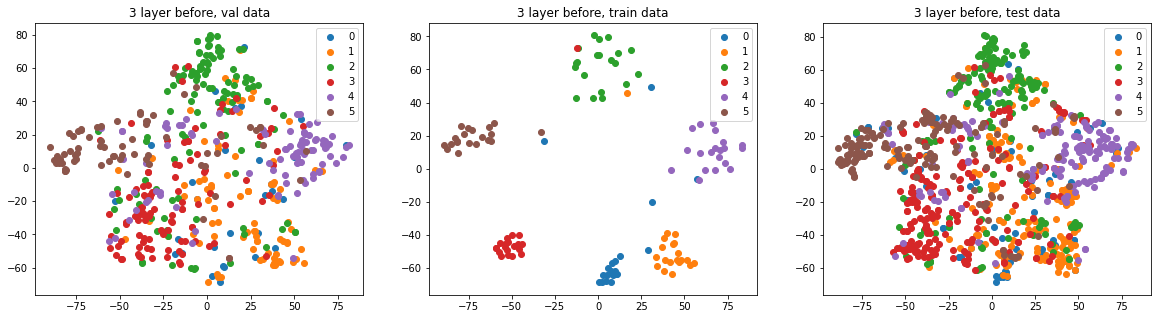

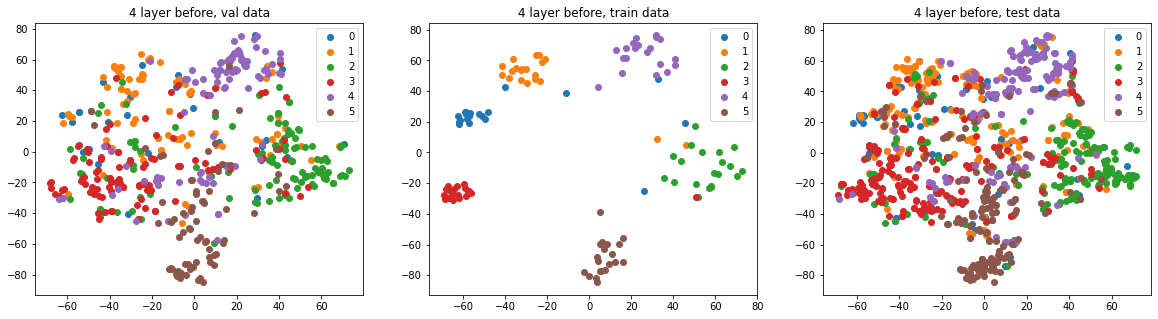

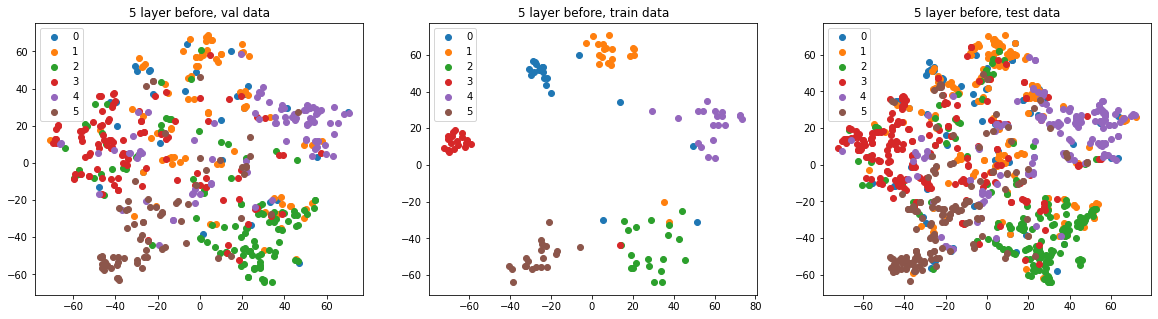

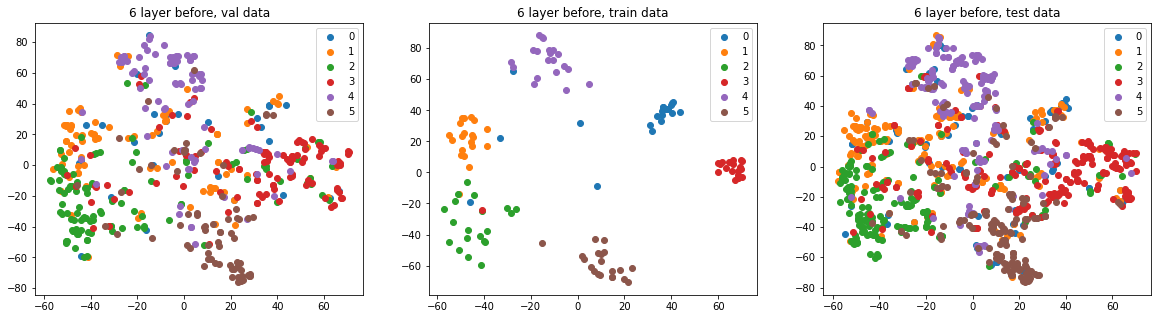

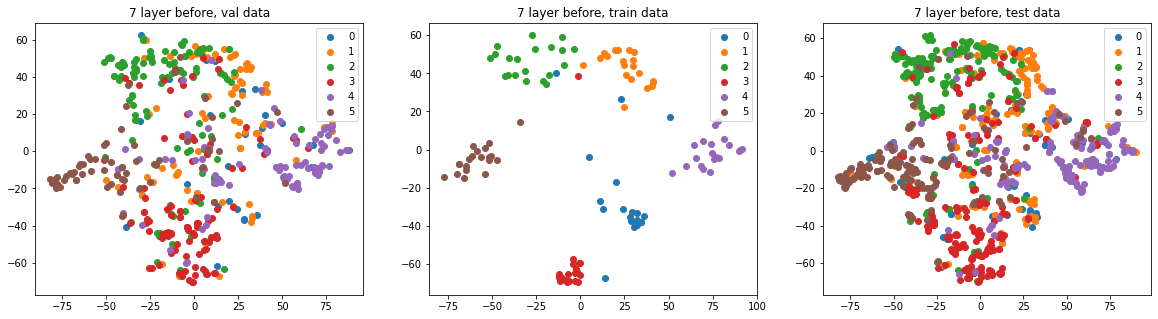

In [58]:
#
#    22번째 CKPT 결과
#

for idx, record in enumerate(hiddim_record):
    tsnu = TSNE().fit_transform(record)

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.title(f'{idx} layer before, val data')
    for label in range(cite.num_classes):
        _X = tsnu[cite[0].val_mask]
        _X = _X[cite[0].y[cite[0].val_mask]==label]
        plt.scatter(_X[:,0], _X[:,1], label=label,linewidth=1)
        plt.legend()

    plt.subplot(1,3,2)
    plt.title(f'{idx} layer before, train data')
    for label in range(cite.num_classes):
        _X = tsnu[cite[0].train_mask]
        _X = _X[cite[0].y[cite[0].train_mask]==label]
        plt.scatter(_X[:,0], _X[:,1], label=label,linewidth=1)
        plt.legend()

    plt.subplot(1,3,3)
    plt.title(f'{idx} layer before, test data')
    for label in range(cite.num_classes):
        _X = tsnu[cite[0].test_mask]
        _X = _X[cite[0].y[cite[0].test_mask]==label]
        plt.scatter(_X[:,0], _X[:,1], label=label,linewidth=1)
        plt.legend()
    plt.show()

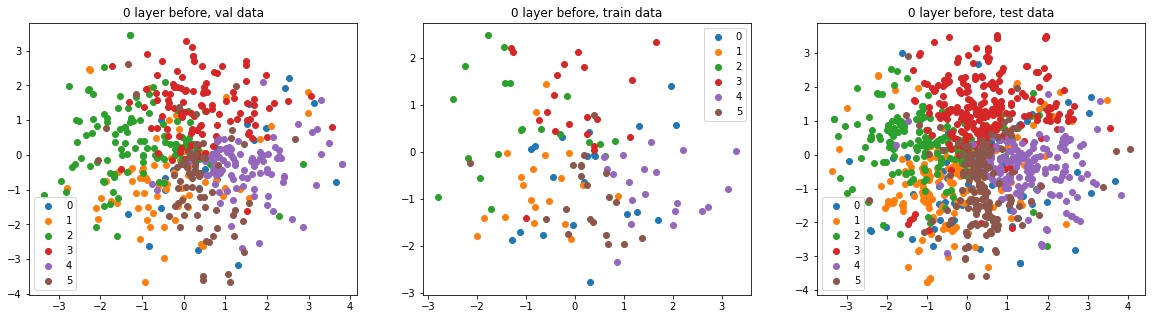

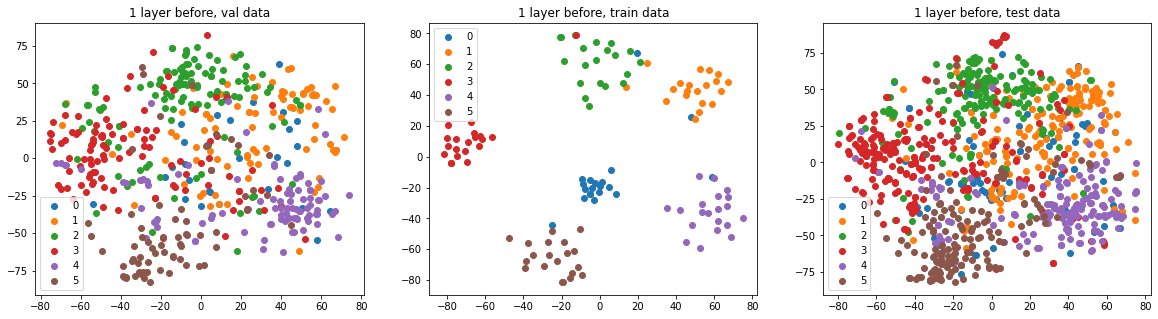

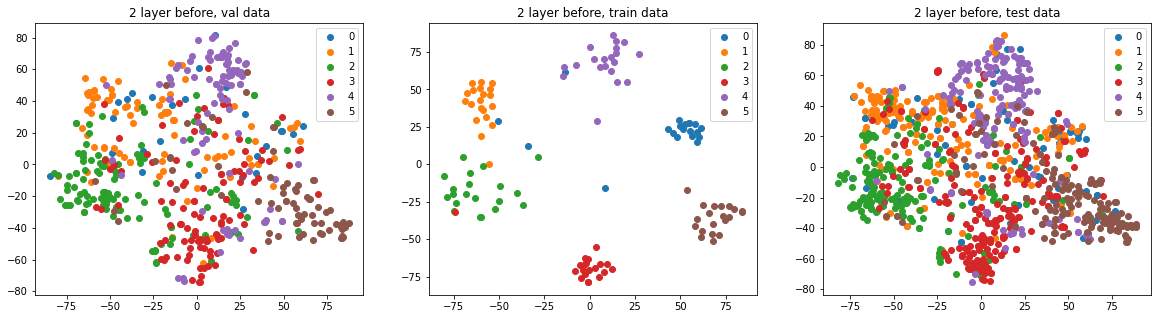

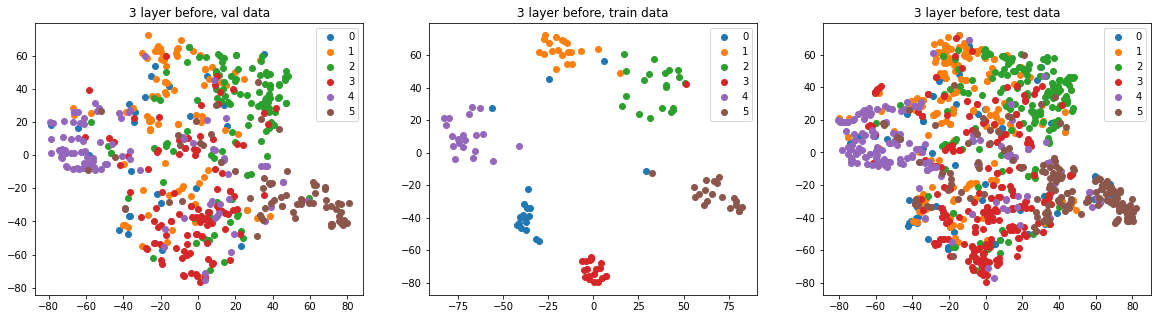

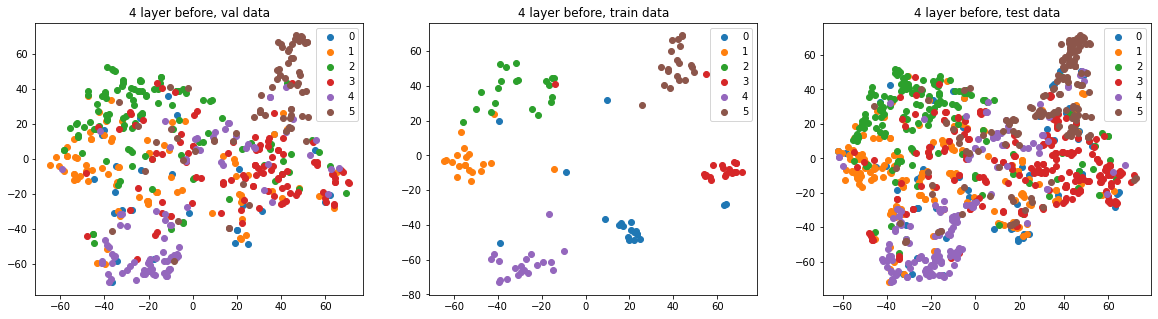

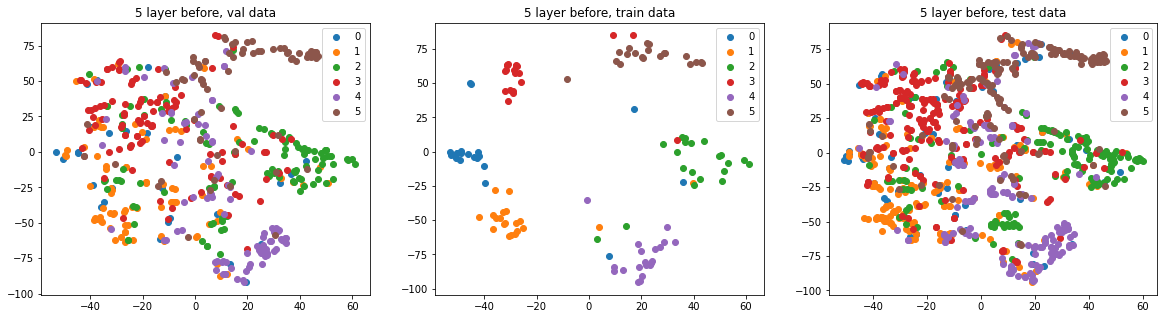

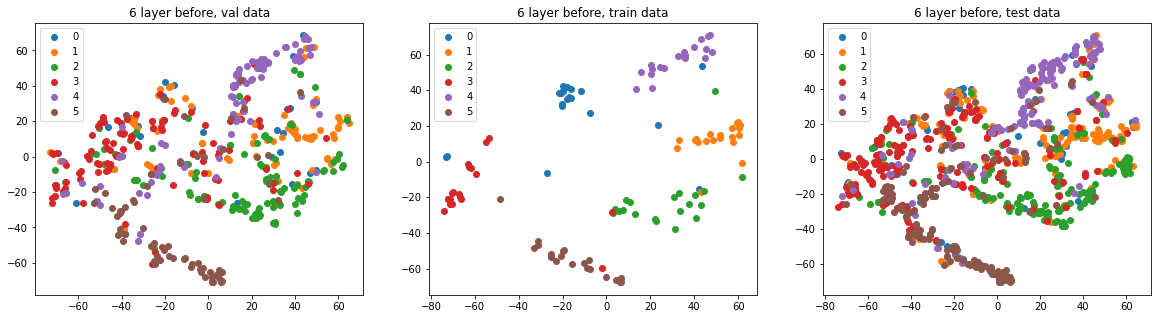

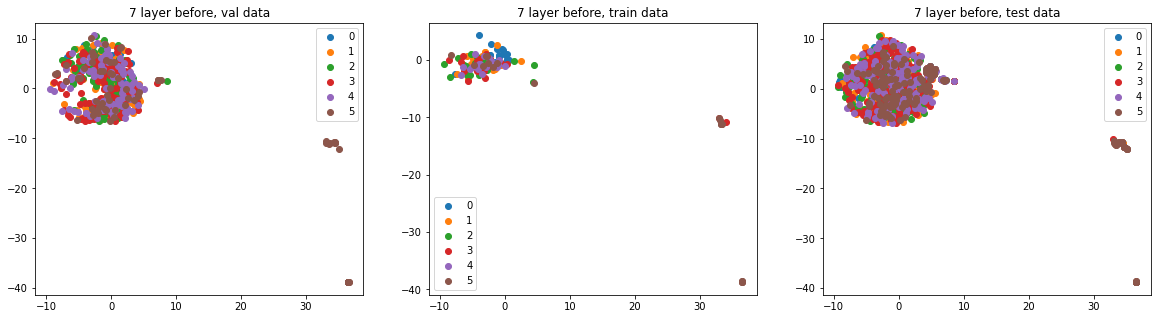

In [53]:
#
#    23번째 CKPT 결과
#
for idx, record in enumerate(hiddim_record):
    tsnu = TSNE().fit_transform(record)

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.title(f'{idx} layer before, val data')
    for label in range(cite.num_classes):
        _X = tsnu[cite[0].val_mask]
        _X = _X[cite[0].y[cite[0].val_mask]==label]
        plt.scatter(_X[:,0], _X[:,1], label=label,linewidth=1)
        plt.legend()

    plt.subplot(1,3,2)
    plt.title(f'{idx} layer before, train data')
    for label in range(cite.num_classes):
        _X = tsnu[cite[0].train_mask]
        _X = _X[cite[0].y[cite[0].train_mask]==label]
        plt.scatter(_X[:,0], _X[:,1], label=label,linewidth=1)
        plt.legend()

    plt.subplot(1,3,3)
    plt.title(f'{idx} layer before, test data')
    for label in range(cite.num_classes):
        _X = tsnu[cite[0].test_mask]
        _X = _X[cite[0].y[cite[0].test_mask]==label]
        plt.scatter(_X[:,0], _X[:,1], label=label,linewidth=1)
        plt.legend()
    plt.show()